In [1]:
import pandas as pd
import os

## Merge CSVs (or load if existing)

In [2]:
df = pd.DataFrame()

if os.path.exists('./data/merged.csv'):
    df = pd.read_csv('./data/merged.csv')
else:    
    files = [file for file in os.listdir('./data')]

    for index, file in enumerate(files):
        frame = pd.read_csv(f'./data/{file}')
        df = pd.concat([df, frame])
        
    df.to_csv('./data/merged.csv', index=False)

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


## Clean data

### Drop NaN

In [3]:
df = df.dropna(how='all')

### Drop dupe headers

In [4]:
df = df[df['Order Date'].str[:2] != 'Or']

### Type columns

In [5]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Quantity Ordered'])

## Augment data

### Add month column

In [6]:
df['Month'] = pd.to_numeric(df['Order Date'].str[:2])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,222910,Apple Airpods Headphones,1,1,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7
1,222911,Flatscreen TV,1,1,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7
2,222912,AA Batteries (4-pack),1,1,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7
3,222913,AA Batteries (4-pack),1,1,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7
4,222914,AAA Batteries (4-pack),5,5,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7


### Add sales column

In [7]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,222910,Apple Airpods Headphones,1,1,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,1
1,222911,Flatscreen TV,1,1,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,1
2,222912,AA Batteries (4-pack),1,1,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,1
3,222913,AA Batteries (4-pack),1,1,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,1
4,222914,AAA Batteries (4-pack),5,5,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,25


### Add city column

In [10]:
def getCity(address):
    return address.split(',')[1]

def getState(address):
    return address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{getCity(x)} {getState(x)}")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,222910,Apple Airpods Headphones,1,1,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,1,Atlanta GA
1,222911,Flatscreen TV,1,1,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,1,Seattle WA
2,222912,AA Batteries (4-pack),1,1,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,1,Atlanta GA
3,222913,AA Batteries (4-pack),1,1,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,1,Atlanta GA
4,222914,AAA Batteries (4-pack),5,5,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,25,Seattle WA


## Question: What was the best month in sales? How much was earned that month?

In [8]:
results = df.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,10903,14151
2,13449,13449,17331
3,17005,17005,22033
4,20558,20558,26604
5,18667,18667,24361
6,15253,15253,19667
7,16072,16072,21108
8,13448,13448,17538
9,13109,13109,16985


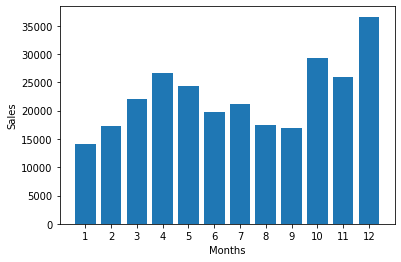

In [9]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel("Sales")
plt.xlabel("Months")
plt.show()

## Question 2: What cities had the highest number of sales?

In [11]:
results = df.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,16602,104794,21184
Austin TX,11153,11153,69829,14469
Boston MA,22528,22528,141112,29600
Dallas TX,16730,16730,104620,21964
Los Angeles CA,33289,33289,208325,43241
New York City NY,27932,27932,175741,36106
Portland ME,2750,2750,17144,3500
Portland OR,11303,11303,70621,14849
San Francisco CA,50239,50239,315520,65223


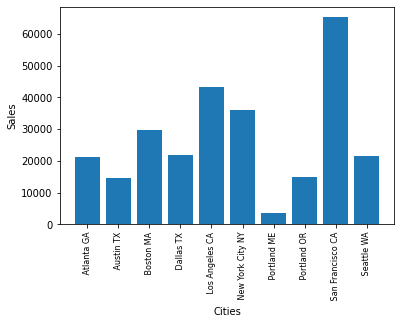

In [17]:
import matplotlib.pyplot as plt

cities = [city for city, df in df.groupby('City')]
plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation="vertical", size=8)
plt.ylabel("Sales")
plt.xlabel("Cities")
plt.show()